<a href="https://colab.research.google.com/github/RobinCHoffpauir/baseball/blob/main/baseballmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Baseball Stat Collection, Parsing, and Fitting to Model

##### installs and import/misc setup

In [ ]:
!pip install pybaseball
!pip install sklearn

In [66]:
import pybaseball as pyb, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, datetime as dt
pyb.cache.enable()
pd.options.display.max_rows=None
%matplotlib inline
global today


###*Data Collection*

In [71]:
# using our global variable 'today', we will assign the current day in IsoFormat
today=dt.datetime.today().isoformat()[:10]

In [ ]:
#using pybaseballs statcast and fangraphs stat scraping modules we collect team batting and statcast data
fg_team_batting = pyb.fg_team_batting_data(2010)
statcast = pyb.statcast(today)

###Clean Data

In [41]:
# using .dropna to clean out deprecated columns, **DONT FORGET THE AXIS ARG!**
statcast=statcast.dropna(axis=1, how='all')


In [75]:
# seperate the pitches that were hit into play
in_play = statcast[statcast['type']=='X']
not_in_play = statcast[statcast['type']!='X']
in_play_types = in_play['events'].unique()
not_in_play_types = not_in_play['events'].unique()

###Exploritory Data Analysis

In [ ]:

statcast.isna().sum()
fg_team_batting.isna().sum()


### **Graphs**



In [ ]:
sns.relplot(x='launch_angle',y='hit_distance_sc',data=statcast)

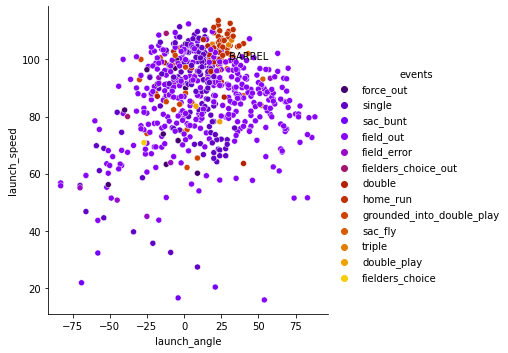

In [54]:
sns.relplot(x='launch_angle',y='launch_speed',hue='events',data=in_play, palette='gnuplot')
plt.annotate(s='BARREL',xy=(30.00,100.00), )
plt.show()